In [1]:
import numpy as np
import pandas as pd
import glob

In [47]:
sample_idx = 0
for filename in glob.glob('/home/garner1/pipelines/WSI-analysis/SG/pipeline/data/tcga.detection/*.gz'):
    try:
        if sample_idx == 0:
            df = pd.read_csv(filename,sep='\t')
            features = df.columns[np.r_[0, 7:18]]
            df_pool = df[features].describe().reset_index()
            df_pool['Image'] = [df[df.columns[0]].iloc[0]]*df_pool.shape[0]
        else:
            df = pd.read_csv(filename,sep='\t')
            df_summary = df[features].describe().reset_index()
            df_summary['Image'] = [df[df.columns[0]].iloc[0]]*df_summary.shape[0]
            df_pool = pd.concat([df_pool, df_summary], ignore_index=True)
        print(sample_idx,df_pool.shape)
        sample_idx += 1
    except:
        pass

0 (8, 13)
1 (16, 13)
2 (24, 13)
3 (32, 13)
4 (40, 13)
5 (48, 13)
6 (56, 13)
7 (64, 13)
8 (72, 13)
9 (80, 13)
10 (88, 13)
11 (96, 13)
12 (104, 13)
13 (112, 13)
14 (120, 13)
15 (128, 13)
16 (136, 13)
17 (144, 13)
18 (152, 13)
19 (160, 13)
20 (168, 13)
21 (176, 13)
22 (184, 13)
23 (192, 13)
24 (200, 13)
25 (208, 13)
26 (216, 13)
27 (224, 13)
28 (232, 13)
29 (240, 13)
30 (248, 13)
31 (256, 13)
32 (264, 13)
33 (272, 13)
34 (280, 13)
35 (288, 13)
36 (296, 13)
37 (304, 13)
38 (312, 13)
39 (320, 13)
40 (328, 13)
41 (336, 13)
42 (344, 13)
43 (352, 13)
44 (360, 13)
45 (368, 13)
46 (376, 13)
47 (384, 13)
48 (392, 13)
49 (400, 13)
50 (408, 13)
51 (416, 13)
52 (424, 13)
53 (432, 13)
54 (440, 13)
55 (448, 13)
56 (456, 13)
57 (464, 13)
58 (472, 13)
59 (480, 13)
60 (488, 13)
61 (496, 13)
62 (504, 13)
63 (512, 13)
64 (520, 13)
65 (528, 13)
66 (536, 13)


/home/garner1/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


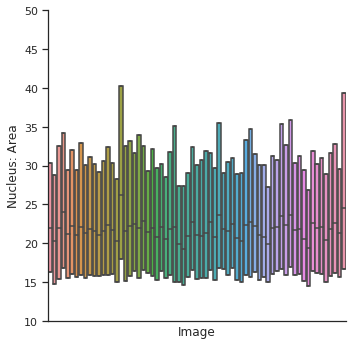

In [48]:
import seaborn as sns
sns.set(style="ticks")
data = df_pool[df_pool['index'].isin(['min','25%','50%','75%','max'])]
g = sns.catplot(x="Image", y=df_pool.columns[1], data=data, kind='box',whis=0)
g.set(ylim=(10, 50))
g.set(xticks=[])